In [4]:
import numpy as np 
import pandas as pd 
from skopt import BayesSearchCV
from skopt.space import Integer, Real
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
        
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.model_selection import (
    train_test_split, 
    cross_val_score, 
    GridSearchCV,
    RandomizedSearchCV
)
#Bibliotecas para EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact
import ipywidgets as widgets
import joblib
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm

# Configurar o estilo de grafico do ggplot
plt.style.use('ggplot')

# Configurar para exibir até 15 linhas de um Dataframe do pandas
pd.set_option('display.max_rows', 15)

# Configurar para exibir todas as colunas de um dataframe do pandas
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('dados.csv')

In [6]:
df.head()

,Unnamed: 0,Date_imp,Date_imp_d,Cluster,Category_name,name,price,disc_price,merchant,condition,Disc_percentage,isSale,Imp_count,brand,p_description,currency,dateAdded,dateSeen,dateUpdated,imageURLs,manufacturer,shipping,sourceURLs,weight,Date_imp_d.1,Day_n,month,month_n,day,Week_Number,Zscore_1,price_std
0,4,2017-12-14 06:00:00,2017/12/14,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,64.99,Walmart.com,New,0.06,Yes,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",USD,2015-05-18T14:14:56Z,2017-12-14T06:00:00Z,2018-06-13T19:39:02Z,NaN,Boytone,Expedited,https://www.walmart.com/ip/BOYTONE-BT210FB-BLA...,14 pounds,2017/12/14,Thursday,12,December,14,50,0.001525,3.880725
1,5,2017-09-08 05:00:00,2017/09/08,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,69.00,Walmart.com,New,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",USD,2015-05-18T14:14:56Z,2017-09-08T05:00:00Z,2018-06-13T19:39:02Z,NaN,Boytone,Expedited,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/09/08,Friday,9,September,8,36,0.001525,3.880725
2,6,2017-10-24 04:00:00,2017/10/24,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,66.00,66.00,Walmart.com,New,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",USD,2015-05-18T14:14:56Z,2017-10-24T04:00:00Z,2018-06-13T19:39:02Z,NaN,Boytone,Expedited,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/10/24,Tuesday,10,October,24,43,-0.760844,3.880725
3,7,2017-08-15 15:00:00,2017/08/15,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,74.99,74.99,Walmart.com,New,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",USD,2015-05-18T14:14:56Z,2017-08-15T15:00:00Z,2018-06-13T19:39:02Z,NaN,Boytone,Value,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/08/15,Tuesday,8,August,15,33,1.523722,3.880725
4,8,2017-09-14 21:00:00,2017/09/14,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.99,69.99,Walmart.com,New,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",USD,2015-05-18T14:14:56Z,2017-09-14T21:00:00Z,2018-06-13T19:39:02Z,NaN,Boytone,Expedited,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/09/14,Thursday,9,September,14,37,0.253107,3.880725


# Analise estatistica

In [7]:
df = df.drop(columns={  'Unnamed: 0', 'Date_imp', 'Cluster', 'condition', 'sourceURLs', 'Date_imp_d.1', 
                                'Zscore_1', 'price_std', 'imageURLs', 'shipping', 'weight', 'currency'})

In [8]:
df.describe()

,price,disc_price,Disc_percentage,Imp_count,month,day,Week_Number
count,23151.000000,23151.000000,23151.000000,23151.000000,23151.000000,23151.000000,23151.000000
mean,513.037803,494.104295,0.016933,6.560926,7.651030,15.693879,31.342750
std,859.110002,808.588973,0.077849,5.403166,2.592843,9.681622,11.316498
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,82.990000,79.990000,0.000000,2.000000,6.000000,7.000000,23.000000
50%,199.990000,199.000000,0.000000,5.000000,8.000000,16.000000,32.000000
75%,540.000000,516.490000,0.000000,10.000000,9.000000,24.000000,38.000000
max,10879.950000,10879.950000,0.800000,31.000000,12.000000,31.000000,51.000000


In [9]:
df.isnull().sum()

Date_imp_d       0
Category_name    0
name             0
price            0
disc_price       0
                ..
Day_n            0
month            0
month_n          0
day              0
Week_Number      0
Length: 20, dtype: int64

In [10]:
df['Date_imp_d'] = pd.to_datetime(df['Date_imp_d'])

In [11]:
df_best = df[df['merchant'] == 'Bestbuy.com']

<Axes: title={'center': 'Best Buy'}, xlabel='Category_name', ylabel='Date_imp_d'>

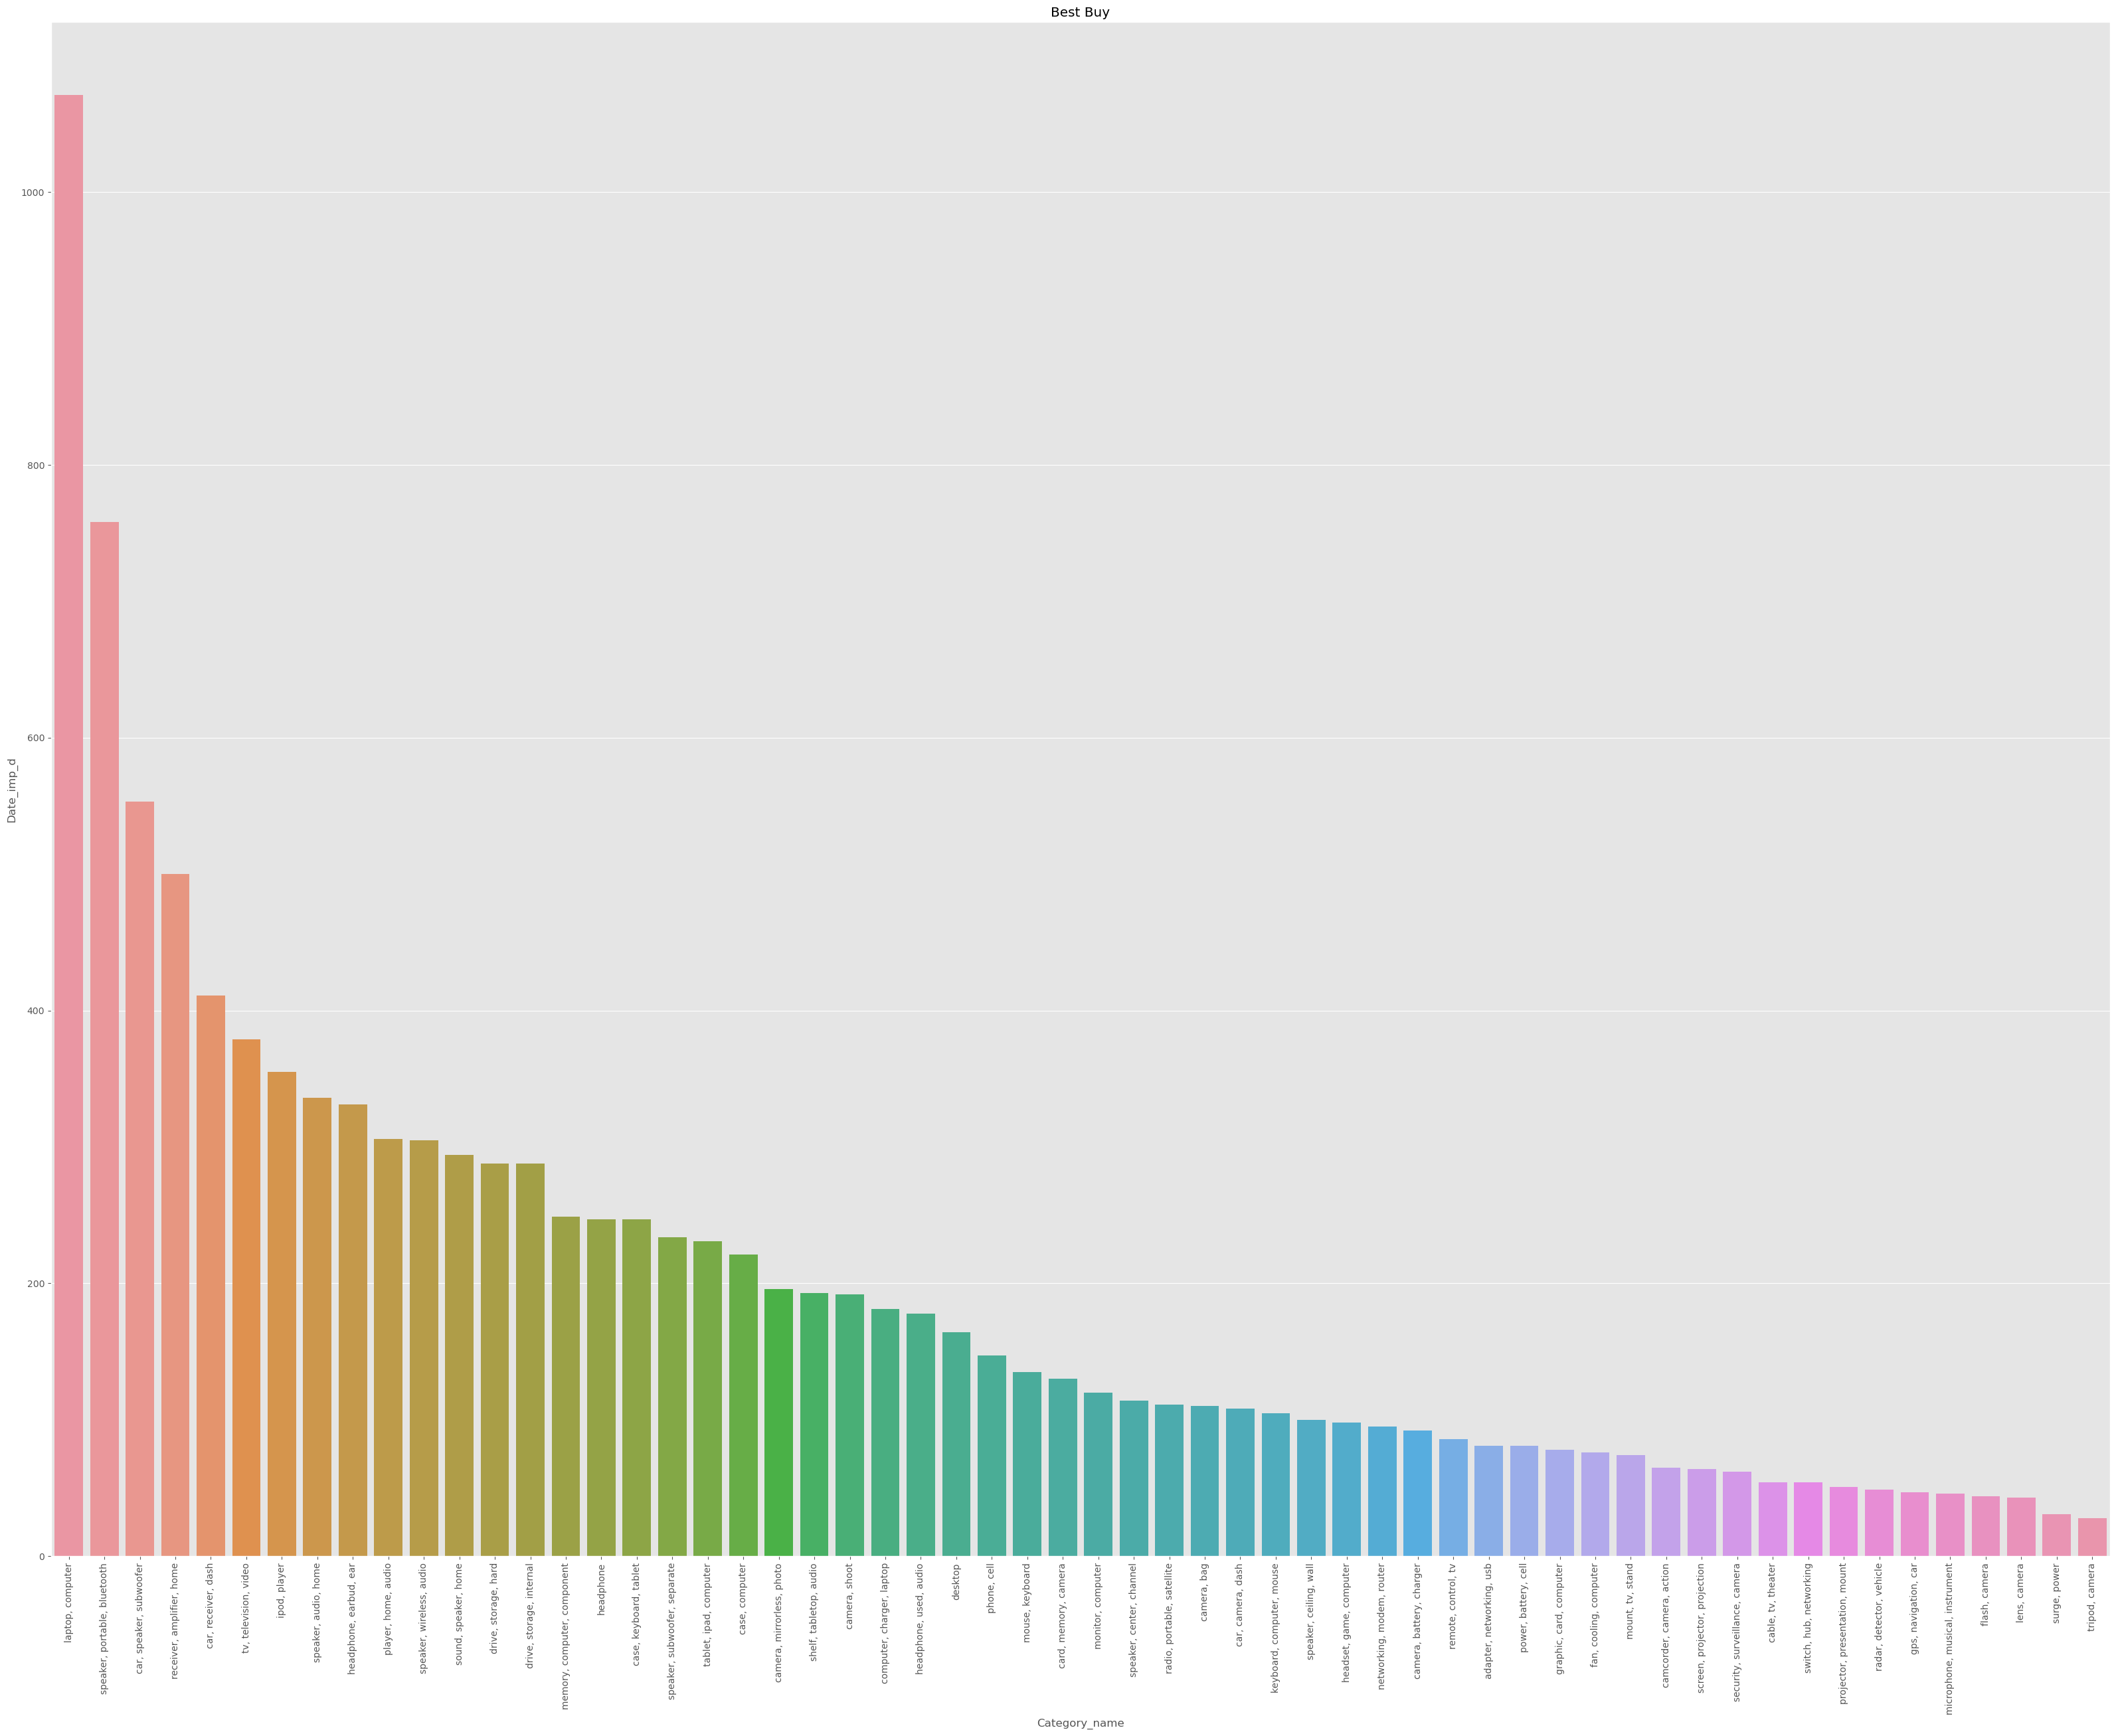

In [12]:
plt.figure(figsize=(40,30))
mais_vendida = df_best[['Date_imp_d','Category_name']].groupby('Category_name').count().reset_index().sort_values(by='Date_imp_d',ascending=False)
plt.xticks(rotation=90)
plt.title('Best Buy')
sns.barplot(x='Category_name', y='Date_imp_d', data=mais_vendida)

<Axes: title={'center': 'Top 5 Best buy'}, xlabel='Category_name', ylabel='Date_imp_d'>

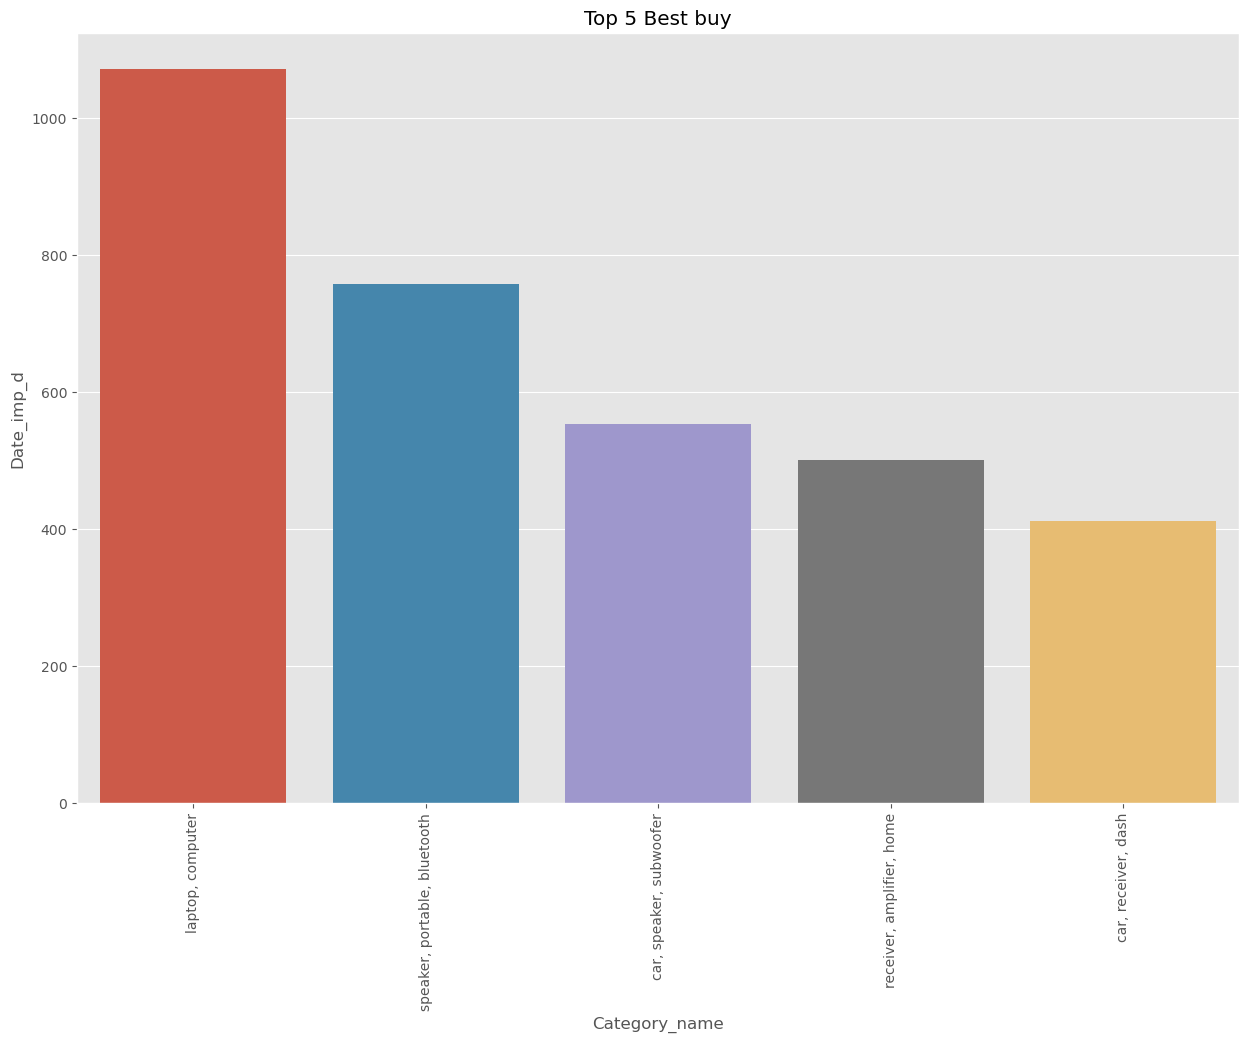

In [13]:
plt.figure(figsize=(15,10))
top5 = mais_vendida.head(5)
plt.xticks(rotation=90)
plt.title('Top 5 Best buy')
sns.barplot(x='Category_name', y='Date_imp_d', data=top5)

In [14]:
mais_vendida.head()

,Category_name,Date_imp_d
27,"laptop, computer",1071
50,"speaker, portable, bluetooth",758
9,"car, speaker, subwoofer",553
41,"receiver, amplifier, home",500
8,"car, receiver, dash",411


In [15]:
df_produtos = df_best[df_best['Category_name']=='speaker, portable, bluetooth']

In [16]:
df_produtos.head()

,Date_imp_d,Category_name,name,price,disc_price,merchant,Disc_percentage,isSale,Imp_count,brand,p_description,dateAdded,dateSeen,dateUpdated,manufacturer,Day_n,month,month_n,day,Week_Number
6,2017-10-10,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.99,69.99,Bestbuy.com,0.0,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-10-10T05:00:00Z,2018-06-13T19:39:02Z,Boytone,Tuesday,10,October,10,41
7,2017-08-28,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,66.99,66.99,Bestbuy.com,0.0,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-08-28T07:00:00Z,2018-06-13T19:39:02Z,Boytone,Monday,8,August,28,35
8,2017-08-12,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,65.99,65.99,Bestbuy.com,0.0,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-08-12T09:00:00Z,2018-06-13T19:39:02Z,Boytone,Saturday,8,August,12,32
9,2017-08-01,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,64.99,64.99,Bestbuy.com,0.0,No,12,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,"2017-08-01T03:00:00Z,2017-07-26T15:00:00Z,2017...",2018-06-13T19:39:02Z,Boytone,Tuesday,8,August,1,31
10,2017-07-26,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,64.99,64.99,Bestbuy.com,0.0,No,12,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,"2017-08-01T03:00:00Z,2017-07-26T15:00:00Z,2017...",2018-06-13T19:39:02Z,Boytone,Wednesday,7,July,26,30


In [17]:
df_produtos.describe()

,Date_imp_d,price,disc_price,Disc_percentage,Imp_count,month,day,Week_Number
count,758,758.000000,758.000000,758.0,758.000000,758.000000,758.000000,758.000000
mean,2017-06-03 12:32:17.730870784,118.706755,118.706755,0.0,8.629288,5.684697,13.383905,22.464380
min,2017-03-03 00:00:00,32.990000,32.990000,0.0,1.000000,3.000000,1.000000,9.000000
25%,2017-03-30 00:00:00,59.990000,59.990000,0.0,4.000000,3.000000,3.000000,13.000000
50%,2017-05-18 00:00:00,99.990000,99.990000,0.0,8.000000,5.000000,10.000000,20.000000
75%,2017-08-01 00:00:00,149.990000,149.990000,0.0,12.000000,8.000000,26.000000,31.000000
max,2017-10-10 00:00:00,349.990000,349.990000,0.0,21.000000,10.000000,31.000000,41.000000
std,NaN,73.103944,73.103944,0.0,5.158368,2.247453,10.870396,10.026289


In [18]:
df_test = df_produtos.groupby(['name', 'Week_Number']).agg({
    'disc_price':'mean',
    'Date_imp_d':'count'

}).reset_index()

df_test.head()

,name,Week_Number,disc_price,Date_imp_d
0,BOOM 2 Wireless Bluetooth Speaker - Indigo,9,199.99,1
1,BOOM 2 Wireless Bluetooth Speaker - Indigo,10,149.99,2
2,BOOM 2 Wireless Bluetooth Speaker - Indigo,13,199.99,1
3,BOOM 2 Wireless Bluetooth Speaker - Indigo,18,199.99,1
4,BOOM 2 Wireless Bluetooth Speaker - Indigo,19,129.99,1


In [39]:
df_test.to_csv('test.csv')

In [19]:
x_price = df_test.pivot(index='Week_Number', columns='name', values='disc_price')
x_price = pd.DataFrame(x_price.to_records())
x_price.head()

,Week_Number,BOOM 2 Wireless Bluetooth Speaker - Indigo,BRAVEN BRV-HD Wireless Bluetooth Speaker [28 Hour Playtime][Water Resistant] Built-In 8800 mAh Power Bank Charger - Black,Bose® - Soundlink® Color Bluetooth Speaker II - Coral Red,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Braven BRV-BLADE Wireless Portable Bluetooth Speaker [22 Hour Playtime][Waterproof] 4000 mAh Power Bank Charger - Black,Chant Mini Portable Bluetooth Wireless Speaker (Navy),Chant Sport BT Portable Audio System (Black),Details About Logitech Ue Roll 2 Wireless Portable Bluetooth Waterproof Speaker,"DreamWave - Tremor Portable Bluetooth Speaker - Green,Black",ECOXGEAR ECOXBT Rugged and Waterproof Wireless Bluetooth Speaker (Orange),ECOXGEAR ECOXBT Waterproof Bluetooth Speaker,"EcoJam Waterproof Bluetooth Speaker, Black",EcoXGear Ecostone Bluetooth Speaker,Ecoxgear Ecocarbon Bluetooth Waterproof Speaker (black),FUGOO - Sport XL Portable Bluetooth Speaker - Black/White,Get Up Stand Bluetooth Home Audio System,HMDX Dynamite Portable Splashproof Wireless Speaker (Gray),Harman Kardon One Portable Bluetooth Speaker Black,House of Marley,JBL Clip2 Portable Speaker,JBL Flip 3 Splashproof Portable Bluetooth Speaker (Teal),"Monster SuperStar BackFloat High-Definition Bluetooth Speaker, Neon Green",New OEM Braven LUX Pearl Portable HD Wireless Bluetooth Speaker Power Bank,Outdoor Tech Buckshot Pro Bluetooth Speaker,"Russound - Acclaim 5 Series 6-1/2 Indoor/Outdoor Speaker (Each) - White""",SRS-XB10 Bluetooth Speaker (White),SRS-XB2 Portable Bluetooth Wireless Speaker (Blue),SRS-XB2 Portable Bluetooth Wireless Speaker (Red),SRS-XB40 Bluetooth Speaker (Black),SRS-XB40 Bluetooth Speaker (Blue),SiriusXM SXSD2 Portable Speaker Dock Audio System for Dock and Play Radios (Black),Sony - XB20 Portable Bluetooth Speaker - Blue,Sony - XB7 Extra Bass Audio System with Bluetooth - Black,Sony SRSHG1/BLK Hi-Res Wireless Speaker- Charcoal black,Sony SRSXB3/BLK Portable Wireless Speaker with Bluetooth (Black),Sony Ultra-Portable Bluetooth Speaker,Tough Portable Bluetooth Speaker (Black and Silver),h.ear go Wireless Speaker (Lime Yellow),iHome Rechargeable Splash Proof Stereo Bluetooth Speaker - Black (IBT33BC),iLive - ISBW216 Wireless Gnome Outdoor Speaker - Multi,iPL24 FM Clock Radio with Lightning Dock and USB Port (Gunmetal)
0,9,199.99,179.99,129.99,64.99,139.99,47.99,99.99,NaN,290.99,72.99,63.99,129.99,104.99,129.99,NaN,299.99,39.99,184.99,179.99,59.99,99.99,NaN,99.99,57.49,249.99,NaN,99.99,99.99,NaN,NaN,105.99,NaN,187.99,149.99,149.99,49.99,229.99,199.99,32.99,33.99,46.99
1,10,149.99,129.99,129.99,64.99,99.99,47.99,99.99,NaN,290.99,72.99,63.99,129.99,107.99,129.99,NaN,225.99,39.99,184.99,179.99,59.99,99.99,NaN,64.99,57.99,249.99,NaN,79.99,79.99,NaN,NaN,102.99,NaN,187.99,149.99,99.99,48.99,229.99,199.99,32.99,33.99,45.99
2,11,NaN,129.99,129.99,NaN,99.99,47.99,99.99,NaN,290.99,72.99,63.99,129.99,107.99,129.99,NaN,225.99,39.99,184.99,179.99,59.99,99.99,NaN,64.99,57.49,249.99,NaN,79.99,79.99,NaN,NaN,NaN,NaN,NaN,149.99,99.99,48.99,229.99,199.99,32.99,33.99,NaN
3,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.99,129.99,106.99,129.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.49,NaN,59.99,NaN,NaN,249.99,249.99,NaN,99.99,NaN,149.99,NaN,NaN,NaN,199.99,NaN,NaN,NaN
4,13,199.99,103.99,129.99,64.99,79.99,47.99,99.99,NaN,290.99,72.99,63.99,129.99,106.99,129.99,NaN,225.99,39.99,174.99,179.99,59.99,79.99,NaN,64.99,57.49,125.99,59.99,79.99,79.99,249.99,249.99,119.99,99.99,218.49,149.99,99.99,49.99,146.99,199.99,49.99,33.99,69.99


In [20]:
y_demand = df_test.pivot(index='Week_Number', columns='name', values='Date_imp_d')
y_demand = pd.DataFrame(y_demand.to_records())
y_demand.head()

,Week_Number,BOOM 2 Wireless Bluetooth Speaker - Indigo,BRAVEN BRV-HD Wireless Bluetooth Speaker [28 Hour Playtime][Water Resistant] Built-In 8800 mAh Power Bank Charger - Black,Bose® - Soundlink® Color Bluetooth Speaker II - Coral Red,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Braven BRV-BLADE Wireless Portable Bluetooth Speaker [22 Hour Playtime][Waterproof] 4000 mAh Power Bank Charger - Black,Chant Mini Portable Bluetooth Wireless Speaker (Navy),Chant Sport BT Portable Audio System (Black),Details About Logitech Ue Roll 2 Wireless Portable Bluetooth Waterproof Speaker,"DreamWave - Tremor Portable Bluetooth Speaker - Green,Black",ECOXGEAR ECOXBT Rugged and Waterproof Wireless Bluetooth Speaker (Orange),ECOXGEAR ECOXBT Waterproof Bluetooth Speaker,"EcoJam Waterproof Bluetooth Speaker, Black",EcoXGear Ecostone Bluetooth Speaker,Ecoxgear Ecocarbon Bluetooth Waterproof Speaker (black),FUGOO - Sport XL Portable Bluetooth Speaker - Black/White,Get Up Stand Bluetooth Home Audio System,HMDX Dynamite Portable Splashproof Wireless Speaker (Gray),Harman Kardon One Portable Bluetooth Speaker Black,House of Marley,JBL Clip2 Portable Speaker,JBL Flip 3 Splashproof Portable Bluetooth Speaker (Teal),"Monster SuperStar BackFloat High-Definition Bluetooth Speaker, Neon Green",New OEM Braven LUX Pearl Portable HD Wireless Bluetooth Speaker Power Bank,Outdoor Tech Buckshot Pro Bluetooth Speaker,"Russound - Acclaim 5 Series 6-1/2 Indoor/Outdoor Speaker (Each) - White""",SRS-XB10 Bluetooth Speaker (White),SRS-XB2 Portable Bluetooth Wireless Speaker (Blue),SRS-XB2 Portable Bluetooth Wireless Speaker (Red),SRS-XB40 Bluetooth Speaker (Black),SRS-XB40 Bluetooth Speaker (Blue),SiriusXM SXSD2 Portable Speaker Dock Audio System for Dock and Play Radios (Black),Sony - XB20 Portable Bluetooth Speaker - Blue,Sony - XB7 Extra Bass Audio System with Bluetooth - Black,Sony SRSHG1/BLK Hi-Res Wireless Speaker- Charcoal black,Sony SRSXB3/BLK Portable Wireless Speaker with Bluetooth (Black),Sony Ultra-Portable Bluetooth Speaker,Tough Portable Bluetooth Speaker (Black and Silver),h.ear go Wireless Speaker (Lime Yellow),iHome Rechargeable Splash Proof Stereo Bluetooth Speaker - Black (IBT33BC),iLive - ISBW216 Wireless Gnome Outdoor Speaker - Multi,iPL24 FM Clock Radio with Lightning Dock and USB Port (Gunmetal)
0,9,1.0,1.0,3.0,2.0,1.0,1.0,1.0,NaN,1.0,1.0,2.0,2.0,1.0,2.0,NaN,1.0,1.0,2.0,1.0,10.0,3.0,NaN,1.0,4.0,1.0,NaN,1.0,2.0,NaN,NaN,2.0,NaN,4.0,2.0,3.0,3.0,1.0,1.0,1.0,1.0,2.0
1,10,2.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,2.0,1.0,NaN,1.0,1.0,2.0,1.0,7.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,NaN,NaN,1.0,NaN,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
2,11,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,2.0,1.0,3.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
3,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,13,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,1.0,2.0,2.0,2.0,1.0,2.0,NaN,1.0,1.0,2.0,1.0,6.0,1.0,NaN,1.0,4.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0


In [21]:
x_price.isnull().sum()

Week_Number                                                                                                                   0
BOOM 2 Wireless Bluetooth Speaker - Indigo                                                                                   12
BRAVEN BRV-HD Wireless Bluetooth Speaker [28 Hour Playtime][Water Resistant] Built-In 8800 mAh Power Bank Charger - Black    19
Bose® - Soundlink® Color Bluetooth Speaker II - Coral Red                                                                     8
Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond                                                                  10
                                                                                                                             ..
Tough Portable Bluetooth Speaker (Black and Silver)                                                                          16
h.ear go Wireless Speaker (Lime Yellow)                                                                 

In [22]:
median = np.around(x_price.median(), 2)
x_price.fillna(median, inplace=True)
x_price.head()

,Week_Number,BOOM 2 Wireless Bluetooth Speaker - Indigo,BRAVEN BRV-HD Wireless Bluetooth Speaker [28 Hour Playtime][Water Resistant] Built-In 8800 mAh Power Bank Charger - Black,Bose® - Soundlink® Color Bluetooth Speaker II - Coral Red,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Braven BRV-BLADE Wireless Portable Bluetooth Speaker [22 Hour Playtime][Waterproof] 4000 mAh Power Bank Charger - Black,Chant Mini Portable Bluetooth Wireless Speaker (Navy),Chant Sport BT Portable Audio System (Black),Details About Logitech Ue Roll 2 Wireless Portable Bluetooth Waterproof Speaker,"DreamWave - Tremor Portable Bluetooth Speaker - Green,Black",ECOXGEAR ECOXBT Rugged and Waterproof Wireless Bluetooth Speaker (Orange),ECOXGEAR ECOXBT Waterproof Bluetooth Speaker,"EcoJam Waterproof Bluetooth Speaker, Black",EcoXGear Ecostone Bluetooth Speaker,Ecoxgear Ecocarbon Bluetooth Waterproof Speaker (black),FUGOO - Sport XL Portable Bluetooth Speaker - Black/White,Get Up Stand Bluetooth Home Audio System,HMDX Dynamite Portable Splashproof Wireless Speaker (Gray),Harman Kardon One Portable Bluetooth Speaker Black,House of Marley,JBL Clip2 Portable Speaker,JBL Flip 3 Splashproof Portable Bluetooth Speaker (Teal),"Monster SuperStar BackFloat High-Definition Bluetooth Speaker, Neon Green",New OEM Braven LUX Pearl Portable HD Wireless Bluetooth Speaker Power Bank,Outdoor Tech Buckshot Pro Bluetooth Speaker,"Russound - Acclaim 5 Series 6-1/2 Indoor/Outdoor Speaker (Each) - White""",SRS-XB10 Bluetooth Speaker (White),SRS-XB2 Portable Bluetooth Wireless Speaker (Blue),SRS-XB2 Portable Bluetooth Wireless Speaker (Red),SRS-XB40 Bluetooth Speaker (Black),SRS-XB40 Bluetooth Speaker (Blue),SiriusXM SXSD2 Portable Speaker Dock Audio System for Dock and Play Radios (Black),Sony - XB20 Portable Bluetooth Speaker - Blue,Sony - XB7 Extra Bass Audio System with Bluetooth - Black,Sony SRSHG1/BLK Hi-Res Wireless Speaker- Charcoal black,Sony SRSXB3/BLK Portable Wireless Speaker with Bluetooth (Black),Sony Ultra-Portable Bluetooth Speaker,Tough Portable Bluetooth Speaker (Black and Silver),h.ear go Wireless Speaker (Lime Yellow),iHome Rechargeable Splash Proof Stereo Bluetooth Speaker - Black (IBT33BC),iLive - ISBW216 Wireless Gnome Outdoor Speaker - Multi,iPL24 FM Clock Radio with Lightning Dock and USB Port (Gunmetal)
0,9,199.99,179.99,129.99,64.99,139.99,47.99,99.99,99.99,290.99,72.99,63.99,129.99,104.99,129.99,299.99,299.99,39.99,184.99,179.99,59.99,99.99,119.95,99.99,57.49,249.99,54.99,99.99,99.99,249.99,249.99,105.99,79.99,187.99,149.99,149.99,49.99,229.99,199.99,32.99,33.99,46.99
1,10,149.99,129.99,129.99,64.99,99.99,47.99,99.99,99.99,290.99,72.99,63.99,129.99,107.99,129.99,299.99,225.99,39.99,184.99,179.99,59.99,99.99,119.95,64.99,57.99,249.99,54.99,79.99,79.99,249.99,249.99,102.99,79.99,187.99,149.99,99.99,48.99,229.99,199.99,32.99,33.99,45.99
2,11,199.99,129.99,129.99,64.99,99.99,47.99,99.99,99.99,290.99,72.99,63.99,129.99,107.99,129.99,299.99,225.99,39.99,184.99,179.99,59.99,99.99,119.95,64.99,57.49,249.99,54.99,79.99,79.99,249.99,249.99,119.49,79.99,255.49,149.99,99.99,48.99,229.99,199.99,32.99,33.99,69.99
3,12,199.99,129.99,129.99,64.99,99.99,41.99,78.49,99.99,290.99,72.99,63.99,129.99,106.99,129.99,299.99,225.99,33.99,184.99,168.24,59.99,79.99,119.95,64.99,57.49,127.99,59.99,79.99,87.49,249.99,249.99,119.49,99.99,255.49,149.99,149.99,66.49,146.99,199.99,37.99,33.99,69.99
4,13,199.99,103.99,129.99,64.99,79.99,47.99,99.99,99.99,290.99,72.99,63.99,129.99,106.99,129.99,299.99,225.99,39.99,174.99,179.99,59.99,79.99,119.95,64.99,57.49,125.99,59.99,79.99,79.99,249.99,249.99,119.99,99.99,218.49,149.99,99.99,49.99,146.99,199.99,49.99,33.99,69.99


In [23]:
y_demand.isnull().sum()

Week_Number                                                                                                                   0
BOOM 2 Wireless Bluetooth Speaker - Indigo                                                                                   12
BRAVEN BRV-HD Wireless Bluetooth Speaker [28 Hour Playtime][Water Resistant] Built-In 8800 mAh Power Bank Charger - Black    19
Bose® - Soundlink® Color Bluetooth Speaker II - Coral Red                                                                     8
Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond                                                                  10
                                                                                                                             ..
Tough Portable Bluetooth Speaker (Black and Silver)                                                                          16
h.ear go Wireless Speaker (Lime Yellow)                                                                 

In [24]:
y_demand.fillna(0, inplace=True)
y_demand.head()

,Week_Number,BOOM 2 Wireless Bluetooth Speaker - Indigo,BRAVEN BRV-HD Wireless Bluetooth Speaker [28 Hour Playtime][Water Resistant] Built-In 8800 mAh Power Bank Charger - Black,Bose® - Soundlink® Color Bluetooth Speaker II - Coral Red,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Braven BRV-BLADE Wireless Portable Bluetooth Speaker [22 Hour Playtime][Waterproof] 4000 mAh Power Bank Charger - Black,Chant Mini Portable Bluetooth Wireless Speaker (Navy),Chant Sport BT Portable Audio System (Black),Details About Logitech Ue Roll 2 Wireless Portable Bluetooth Waterproof Speaker,"DreamWave - Tremor Portable Bluetooth Speaker - Green,Black",ECOXGEAR ECOXBT Rugged and Waterproof Wireless Bluetooth Speaker (Orange),ECOXGEAR ECOXBT Waterproof Bluetooth Speaker,"EcoJam Waterproof Bluetooth Speaker, Black",EcoXGear Ecostone Bluetooth Speaker,Ecoxgear Ecocarbon Bluetooth Waterproof Speaker (black),FUGOO - Sport XL Portable Bluetooth Speaker - Black/White,Get Up Stand Bluetooth Home Audio System,HMDX Dynamite Portable Splashproof Wireless Speaker (Gray),Harman Kardon One Portable Bluetooth Speaker Black,House of Marley,JBL Clip2 Portable Speaker,JBL Flip 3 Splashproof Portable Bluetooth Speaker (Teal),"Monster SuperStar BackFloat High-Definition Bluetooth Speaker, Neon Green",New OEM Braven LUX Pearl Portable HD Wireless Bluetooth Speaker Power Bank,Outdoor Tech Buckshot Pro Bluetooth Speaker,"Russound - Acclaim 5 Series 6-1/2 Indoor/Outdoor Speaker (Each) - White""",SRS-XB10 Bluetooth Speaker (White),SRS-XB2 Portable Bluetooth Wireless Speaker (Blue),SRS-XB2 Portable Bluetooth Wireless Speaker (Red),SRS-XB40 Bluetooth Speaker (Black),SRS-XB40 Bluetooth Speaker (Blue),SiriusXM SXSD2 Portable Speaker Dock Audio System for Dock and Play Radios (Black),Sony - XB20 Portable Bluetooth Speaker - Blue,Sony - XB7 Extra Bass Audio System with Bluetooth - Black,Sony SRSHG1/BLK Hi-Res Wireless Speaker- Charcoal black,Sony SRSXB3/BLK Portable Wireless Speaker with Bluetooth (Black),Sony Ultra-Portable Bluetooth Speaker,Tough Portable Bluetooth Speaker (Black and Silver),h.ear go Wireless Speaker (Lime Yellow),iHome Rechargeable Splash Proof Stereo Bluetooth Speaker - Black (IBT33BC),iLive - ISBW216 Wireless Gnome Outdoor Speaker - Multi,iPL24 FM Clock Radio with Lightning Dock and USB Port (Gunmetal)
0,9,1.0,1.0,3.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0,10.0,3.0,0.0,1.0,4.0,1.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,4.0,2.0,3.0,3.0,1.0,1.0,1.0,1.0,2.0
1,10,2.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,2.0,1.0,7.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
2,11,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,3.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0,6.0,1.0,0.0,1.0,4.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0


In [25]:
values_result = {'name':[],
                 'price_elastic':[],
                 'price_mean':[],
                 'quantity_mean':[],
                 'intercept':[],
                 'slope':[],
                 'rsquared':[],
                 'pvalue':[]
                 }



for i in x_price.columns[1:]:
    column_point = []
    for j in range(len(x_price[i])):
        column_point.append((x_price[i][j], y_demand[i][j]))
    df = pd.DataFrame(list(column_point), columns=['x_price', 'y_demand'])



    x_produto = df['x_price']
    y_produto= df['y_demand']
    
    X_produto = sm.add_constant(x_produto)
    modelo = sm.OLS(y_produto, X_produto)
    result = modelo.fit()

    if result.f_pvalue< 0.05:
        rsquared = result.rsquared
        pvalue = result.f_pvalue
        intercept, slope = result.params
        mean_price = np.mean(x_produto)
        mean_quanti = np.mean(y_produto)
        price_elasti = slope * (mean_price/mean_quanti)

        values_result['name'].append(i)
        values_result['price_elastic'].append(price_elasti)
        values_result['price_mean'].append(mean_price)
        values_result['quantity_mean'].append(mean_quanti)
        values_result['intercept'].append(intercept)
        values_result['slope'].append(slope)
        values_result['rsquared'].append(rsquared)
        values_result['pvalue'].append(pvalue)

df_price_elastic = pd.DataFrame.from_dict(values_result)


In [26]:
index1 = df_price_elastic[df_price_elastic['name'] == 'Monster SuperStar BackFloat High-Definition Bluetooth Speaker, Neon Green'].index
index2 = df_price_elastic[df_price_elastic['name'] == 'DreamWave - Tremor Portable Bluetooth Speaker - Green,Black'].index

# Remova a linha usando o índice
df_price_elastic = df_price_elastic.drop(index1)
df_price_elastic = df_price_elastic.drop(index2)

df_price_elastic

,name,price_elastic,price_mean,quantity_mean,intercept,slope,rsquared,pvalue
0,BOOM 2 Wireless Bluetooth Speaker - Indigo,-4.579784,189.555217,0.695652,3.881589,-0.016807,0.195595,0.034593
2,FUGOO - Sport XL Portable Bluetooth Speaker - ...,-9.427256,291.642174,0.260870,2.720154,-0.008433,0.185972,0.039924
3,Get Up Stand Bluetooth Home Audio System,5.721514,238.859565,0.608696,-2.873965,0.014580,0.405843,0.001079
4,JBL Flip 3 Splashproof Portable Bluetooth Spea...,10.417129,82.596957,0.521739,-4.913285,0.065802,0.328917,0.004222
6,SRS-XB2 Portable Bluetooth Wireless Speaker (B...,11.974735,83.033478,0.478261,-5.248786,0.068973,0.506519,0.000140
7,SRS-XB40 Bluetooth Speaker (Black),-6.954599,241.294348,0.913043,7.262895,-0.026316,0.262109,0.012512
8,SRS-XB40 Bluetooth Speaker (Blue),-7.027162,243.468261,0.739130,5.933120,-0.021333,0.205622,0.029768
9,SiriusXM SXSD2 Portable Speaker Dock Audio Sys...,-5.995652,115.055217,0.652174,4.562382,-0.033985,0.230630,0.020378
10,iPL24 FM Clock Radio with Lightning Dock and U...,-4.579348,67.946522,0.608696,3.396125,-0.041024,0.227062,0.021519


In [27]:
df_price_elastic.to_csv('priceelastic.csv', index=False)

In [28]:


def divergent_plot(df, values_column, ylabel, xlabel):
    
    df['ranking'] = df[values_column].rank(ascending=True).astype(int)
    df.sort_values(values_column, ascending=False, inplace=True)
    
    fig, ax = plt.subplots(figsize=(12, 5), dpi=80)
    ax.set_facecolor('none')  

    
    ax.hlines(y=df['ranking'], xmin=0, xmax=df[values_column], color='gray', linewidth=3)
    
    # Adicionar rótulos de elasticidade
    for x, y, tex in zip(df[values_column], df['ranking'], df[values_column]):
        ax.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':10})
    
    
    ax.xaxis.grid(True, linestyle='--', alpha=0.5)  
    ax.yaxis.grid(True, linestyle='--', alpha=0.5)  
    
   
    ax.set(ylabel=ylabel, xlabel=xlabel)
    ax.yaxis.set_tick_params(width=2) 
    plt.title(values_column, fontdict={'size':13})
    plt.show()
            
    
    pd.set_option('display.width', 4000)
    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]
    df = df.iloc[:, :3]
    df.set_index('ranking', inplace=True)
    display(df)



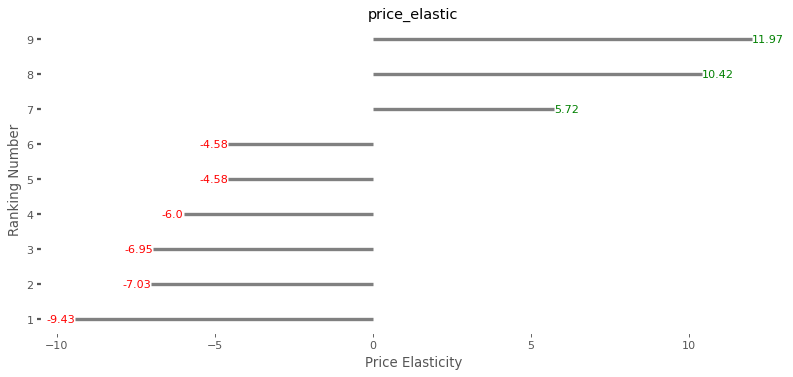

,name,price_elastic
ranking,,
9,SRS-XB2 Portable Bluetooth Wireless Speaker (B...,11.974735
8,JBL Flip 3 Splashproof Portable Bluetooth Spea...,10.417129
7,Get Up Stand Bluetooth Home Audio System,5.721514
6,iPL24 FM Clock Radio with Lightning Dock and U...,-4.579348
5,BOOM 2 Wireless Bluetooth Speaker - Indigo,-4.579784
4,SiriusXM SXSD2 Portable Speaker Dock Audio Sys...,-5.995652
3,SRS-XB40 Bluetooth Speaker (Black),-6.954599
2,SRS-XB40 Bluetooth Speaker (Blue),-7.027162
1,FUGOO - Sport XL Portable Bluetooth Speaker - ...,-9.427256


In [29]:
divergent_plot(df_price_elastic,'price_elastic','Ranking Number', 'Price Elasticity' )

In [30]:
df_order_elasticity = df_price_elastic[['ranking', 'name', 'price_elastic']].sort_values(by='price_elastic', ascending=False)

In [38]:
df_order_elasticity

,ranking,name,price_elastic
6,9,SRS-XB2 Portable Bluetooth Wireless Speaker (B...,11.974735
4,8,JBL Flip 3 Splashproof Portable Bluetooth Spea...,10.417129
3,7,Get Up Stand Bluetooth Home Audio System,5.721514
10,6,iPL24 FM Clock Radio with Lightning Dock and U...,-4.579348
0,5,BOOM 2 Wireless Bluetooth Speaker - Indigo,-4.579784
9,4,SiriusXM SXSD2 Portable Speaker Dock Audio Sys...,-5.995652
7,3,SRS-XB40 Bluetooth Speaker (Black),-6.954599
8,2,SRS-XB40 Bluetooth Speaker (Blue),-7.027162
2,1,FUGOO - Sport XL Portable Bluetooth Speaker - ...,-9.427256


In [37]:
df_order_elasticity.to_csv('order_price.csv')

In [31]:

faturamento_dict = {
    'name':[],
    'faturamento_atual':[],
    'faturamento_redução':[],
    'perda_faturamento':[],
    'faturamento_novo':[],
    'variacao_faturamento':[],
    'variacao_percentual':[]
}

for index, row in df_order_elasticity.iterrows():
    preco_atual_medio = x_price[row['name']].mean()
    demanda_atual = x_price[row['name']].sum()

    preco_redu = preco_atual_medio * 0.9
    demanda_aume = row['price_elastic'] * 0.1
    demanda_nova = demanda_aume * demanda_atual
    faturamento_atual = round(preco_atual_medio * demanda_atual, 2)
    novo_faturamento = round(preco_redu * demanda_nova, 2)

    faturamento_reduzido = round(faturamento_atual * 0.9, 2)
    perda_faturamento = round(faturamento_atual - faturamento_reduzido, 2)
    variacao_faturamento = round(novo_faturamento - faturamento_atual, 2)
    variacao_percentual = round(((novo_faturamento - faturamento_atual) / faturamento_atual), 2)

    faturamento_dict['name'].append(row['name'])
    faturamento_dict['faturamento_atual'].append(faturamento_atual)
    faturamento_dict['faturamento_redução'].append(faturamento_reduzido)
    faturamento_dict['perda_faturamento'].append(perda_faturamento)
    faturamento_dict['faturamento_novo'].append(novo_faturamento)
    faturamento_dict['variacao_faturamento'].append(variacao_faturamento)
    faturamento_dict['variacao_percentual'].append(variacao_percentual)

df_result = pd.DataFrame(faturamento_dict)
df_result


,name,faturamento_atual,faturamento_redução,perda_faturamento,faturamento_novo,variacao_faturamento,variacao_percentual
0,SRS-XB2 Portable Bluetooth Wireless Speaker (B...,158574.85,142717.37,15857.48,170900.25,12325.40,0.08
1,JBL Flip 3 Splashproof Portable Bluetooth Spea...,156911.92,141220.73,15691.19,147111.45,-9800.47,-0.06
2,Get Up Stand Bluetooth Home Audio System,1312239.51,1181015.56,131223.95,675719.73,-636519.78,-0.49
3,iPL24 FM Clock Radio with Lightning Dock and U...,106184.79,95566.31,10618.48,-43763.14,-149947.93,-1.41
4,BOOM 2 Wireless Bluetooth Speaker - Indigo,826417.15,743775.44,82641.71,-340633.06,-1167050.21,-1.41
5,SiriusXM SXSD2 Portable Speaker Dock Audio Sys...,304467.17,274020.45,30446.72,-164293.13,-468760.30,-1.54
6,SRS-XB40 Bluetooth Speaker (Black),1339128.13,1205215.32,133912.81,-838178.93,-2177307.06,-1.63
7,SRS-XB40 Bluetooth Speaker (Blue),1363366.26,1227029.63,136336.63,-862253.65,-2225619.91,-1.63
8,FUGOO - Sport XL Portable Bluetooth Speaker - ...,1956268.62,1760641.76,195626.86,-1659802.08,-3616070.70,-1.85


## Precificação cruzada

In [32]:
def pricingcross(df_x, df_y, column_name):
    
    new_df = x_price.copy()
    
    new_df['y_value-' + column_name] = y_demand[column_name]

    multi_xvalues =new_df.loc[:, new_df.columns[1:-1]]
    multi_yvalues = new_df.loc[:, new_df.columns[-1]]

    mean_xvalues = np.mean(multi_xvalues)
    mean_yvalues = np.mean(multi_yvalues)


    # regressão linear
    X = sm.add_constant(multi_xvalues)
    model = sm.OLS(multi_yvalues, X, missing='drop')
    result = model.fit()

    #obtendo os resultados
    results_summary = result.summary()
    # p-valores para cada coeficiente
    pvalue = result.pvalues

    # transformando o resultado em uma dataframe
    results_as_html = results_summary.tables[1].as_html()
    new_dataframe = pd.read_html(results_as_html, header=0, index_col=0)[0]

    #adicionando o p-valor ao dataframe
    new_dataframe['p_value'] = pvalue

    #definindo o nome do produto como indice
    new_dataframe.index.name= 'name'
    new_dataframe.reset_index()

    #calculando a elasticidade cruzada
    new_dataframe['mean'] = mean_xvalues
    new_dataframe['price_elasticity'] = round((new_dataframe.coef)*(new_dataframe['mean']/mean_yvalues), 2)

    new_dataframe = new_dataframe.reset_index()
    pvalue_siginicant = new_dataframe['p_value']

    #verificando a hipótese nula(inclinação por produto)
    new_dataframe[column_name + 'CPE'] = np.where((pvalue_siginicant > 0.05), 'No Effect', new_dataframe['price_elasticity'])
    new_dataframe = new_dataframe.dropna()
    return new_dataframe[['name', column_name + 'CPE']]

In [33]:
result_df = pd.DataFrame()
for column in x_price.columns[1:]:
    result_df[['name', column +'CPE']] = pricingcross(x_price, y_demand, column)

result_df = result_df.set_index('name')
result_df

,BOOM 2 Wireless Bluetooth Speaker - IndigoCPE,BRAVEN BRV-HD Wireless Bluetooth Speaker [28 Hour Playtime][Water Resistant] Built-In 8800 mAh Power Bank Charger - BlackCPE,Bose® - Soundlink® Color Bluetooth Speaker II - Coral RedCPE,Boytone - 2500W 2.1-Ch. Home Theater System - Black DiamondCPE,Braven BRV-BLADE Wireless Portable Bluetooth Speaker [22 Hour Playtime][Waterproof] 4000 mAh Power Bank Charger - BlackCPE,Chant Mini Portable Bluetooth Wireless Speaker (Navy)CPE,Chant Sport BT Portable Audio System (Black)CPE,Details About Logitech Ue Roll 2 Wireless Portable Bluetooth Waterproof SpeakerCPE,"DreamWave - Tremor Portable Bluetooth Speaker - Green,BlackCPE",ECOXGEAR ECOXBT Rugged and Waterproof Wireless Bluetooth Speaker (Orange)CPE,ECOXGEAR ECOXBT Waterproof Bluetooth SpeakerCPE,"EcoJam Waterproof Bluetooth Speaker, BlackCPE",EcoXGear Ecostone Bluetooth SpeakerCPE,Ecoxgear Ecocarbon Bluetooth Waterproof Speaker (black)CPE,FUGOO - Sport XL Portable Bluetooth Speaker - Black/WhiteCPE,Get Up Stand Bluetooth Home Audio SystemCPE,HMDX Dynamite Portable Splashproof Wireless Speaker (Gray)CPE,Harman Kardon One Portable Bluetooth Speaker BlackCPE,House of MarleyCPE,JBL Clip2 Portable SpeakerCPE,JBL Flip 3 Splashproof Portable Bluetooth Speaker (Teal)CPE,"Monster SuperStar BackFloat High-Definition Bluetooth Speaker, Neon GreenCPE",New OEM Braven LUX Pearl Portable HD Wireless Bluetooth Speaker Power BankCPE,Outdoor Tech Buckshot Pro Bluetooth SpeakerCPE,"Russound - Acclaim 5 Series 6-1/2 Indoor/Outdoor Speaker (Each) - White""CPE",SRS-XB10 Bluetooth Speaker (White)CPE,SRS-XB2 Portable Bluetooth Wireless Speaker (Blue)CPE,SRS-XB2 Portable Bluetooth Wireless Speaker (Red)CPE,SRS-XB40 Bluetooth Speaker (Black)CPE,SRS-XB40 Bluetooth Speaker (Blue)CPE,SiriusXM SXSD2 Portable Speaker Dock Audio System for Dock and Play Radios (Black)CPE,Sony - XB20 Portable Bluetooth Speaker - BlueCPE,Sony - XB7 Extra Bass Audio System with Bluetooth - BlackCPE,Sony SRSHG1/BLK Hi-Res Wireless Speaker- Charcoal blackCPE,Sony SRSXB3/BLK Portable Wireless Speaker with Bluetooth (Black)CPE,Sony Ultra-Portable Bluetooth SpeakerCPE,Tough Portable Bluetooth Speaker (Black and Silver)CPE,h.ear go Wireless Speaker (Lime Yellow)CPE,iHome Rechargeable Splash Proof Stereo Bluetooth Speaker - Black (IBT33BC)CPE,iLive - ISBW216 Wireless Gnome Outdoor Speaker - MultiCPE,iPL24 FM Clock Radio with Lightning Dock and USB Port (Gunmetal)CPE
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
const,0.02,-0.01,0.0,0.01,-0.01,0.01,0.01,0.02,0.01,0.01,0.0,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.01,-0.01,0.02,0.01,0.01,0.01,0.01,0.0,0.0,0.01,0.02,0.01,0.02,0.04,-0.02,0.01,0.0,0.0,-0.02,0.01,0.01,0.01
BOOM 2 Wireless Bluetooth Speaker - Indigo,-1.7,0.07,1.05,-0.38,0.07,0.71,0.71,2.73,0.71,-0.85,0.29,-1.34,-2.26,-1.28,4.45,0.14,0.14,-0.57,-0.06,0.5,0.84,4.45,3.88,-2.03,0.71,1.91,-3.34,-2.11,-1.27,-1.87,0.21,0.5,2.74,-2.73,0.51,-0.57,0.29,-3.03,-0.73,0.71,0.23
BRAVEN BRV-HD Wireless Bluetooth Speaker [28 Hour Playtime][Water Resistant] Built-In 8800 mAh Power Bank Charger - Black,-1.13,-0.5,-1.38,0.98,-0.5,-0.77,-0.77,-2.12,-0.77,-1.22,-1.55,-0.37,-1.68,-1.12,-2.2,-1.29,-1.29,-0.05,-0.14,0.02,1.29,-2.2,-4.11,-0.15,-0.77,-2.14,-0.73,-1.07,-1.71,-1.72,0.06,-1.94,3.27,-0.47,-0.15,-0.9,1.56,-1.17,-0.66,-0.77,1.37
Bose® - Soundlink® Color Bluetooth Speaker II - Coral Red,2.24,-1.08,1.27,1.15,-1.08,0.19,0.19,3.77,0.19,1.32,0.92,0.49,1.49,0.53,4.59,-0.1,-0.1,-0.21,-0.21,0.86,1.77,4.59,2.53,0.28,0.19,0.91,-0.68,1.46,0.66,1.05,1.99,0.67,1.14,-0.56,1.18,1.95,-0.33,-0.39,-0.53,0.19,2.03
Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,1.61,-0.29,1.04,1.93,-0.29,1.86,1.86,0.72,1.86,1.16,-0.14,0.75,1.24,0.72,3.44,0.82,0.82,0.89,2.15,1.7,-0.77,3.44,1.29,0.45,1.86,2.76,0.5,0.27,2.12,2.09,1.86,2.77,8.13,-3.63,1.35,0.06,0.62,-3.64,1.06,1.86,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [35]:
result_df.to_csv('crossprice.csv')